In [295]:
#importing important libraries

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split

In [296]:
#reading the file

file = pd.read_csv('bicyclesharing.csv')

In [297]:
file.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [298]:
file.shape

(10886, 12)

In [299]:
file.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<h2> No data cleaning is required since no null value is found <h2>

In [300]:
file.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [301]:
file.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [302]:
file.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [303]:
#creating correlation matrix for the variables in the dataset

file.corr(method="pearson")

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<h2> the variables 'atemp' and 'temp' have a strong correlation. thus, we can drop the veriable atemp without affecting the dataset <h2>

In [304]:
file.drop('atemp', axis=1, inplace = True)

In [305]:
file['season'].unique()

array([1, 2, 3, 4], dtype=int64)

<h1> Data Visualization <h1> 
 <h3>Season:  1 = spring, 2 = summer, 3 = fall, 4 = winter<h3>
     <h3> This representation below reveals that the members("either registered or not") tend to demand for the bicycle rental service most during fall season and rerely demand for the service during spring season compared to other seasons  <h3>

In [306]:
# This gives the mean registered numbers of members in respect to the season

file.groupby('season')['registered'].mean()

season
1    100.853686
2    167.804610
3    182.196853
4    170.407462
Name: registered, dtype: float64

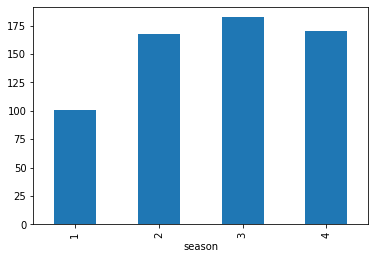

In [307]:
#graphical representation of the mean registered numbers of members in respect to the season

file.groupby('season')['registered'].mean().plot(kind='bar')

In [308]:
# This gives the mean non-registered numbers of members in respect to the season

file.groupby('season')['casual'].mean()

season
1    15.489576
2    47.446762
3    52.220271
4    28.580834
Name: casual, dtype: float64

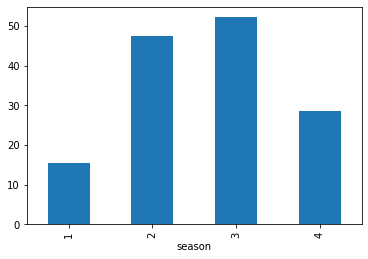

In [309]:
#graphical representation of the mean non-registered numbers of members in respect to the season

file.groupby('season')['casual'].mean().plot(kind='bar')

<h1> Data Visualization <h1> 
 <h3>Holiday:  0 = No Holiday, 1 = Holiday<h3>
     <h3> The representation below reveals that registered members demands for the bicycle rental more when there is no holiday. <br><br>This could be assumed to be because the users go to work when there is no holiday thus needing to ride a bicycle to work and they tends to relax at home when there is holiday <h3> 

In [310]:
#graphical representation of the mean registered numbers of members in respect to the Holiday

file.groupby('holiday')['registered'].mean()

holiday
0    156.094941
1    137.096463
Name: registered, dtype: float64

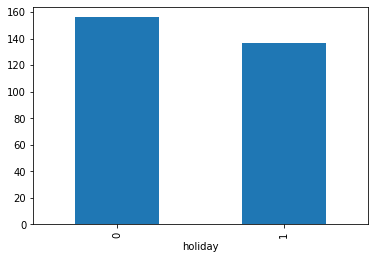

In [311]:
#graphical representation of the mean registered numbers of members in respect to the Holiday

file.groupby('holiday')['registered'].mean().plot(kind='bar')

In [312]:
#graphical representation of the mean non-registered numbers of members in respect to the season

file.groupby('holiday')['casual'].mean()

holiday
0    35.646714
1    48.781350
Name: casual, dtype: float64

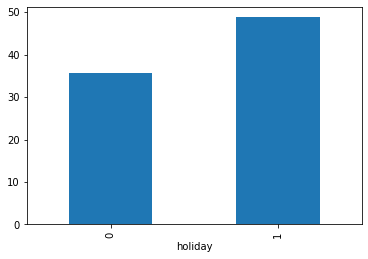

In [313]:
#graphical representation of the mean non-registered numbers of members in respect to the season

file.groupby('holiday')['casual'].mean().plot(kind='bar')

<h1> Data Visualization <h1> 
 <h3>Working Day:  0 = No , 1 = Yes<h3>
     <h3> For registered members, There seems to be more demand for the bicycle rental during working days.<br> <br> This is expected since we have the conclusion drawned from the above representation about holiday <h3>

In [317]:
#graphical representation of the mean registered numbers of members in respect to the working day

file.groupby('workingday')['registered'].mean()

workingday
0    129.198330
1    167.904209
Name: registered, dtype: float64

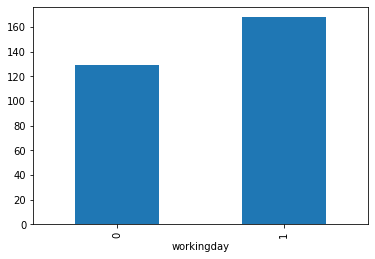

In [318]:
#graphical representation of the mean registered numbers of members in respect to the working day

file.groupby('workingday')['registered'].mean().plot(kind='bar')

In [319]:
#graphical representation of the mean non-registered numbers of members in respect to the working day

file.groupby('workingday')['casual'].mean()

workingday
0    59.308290
1    25.107663
Name: casual, dtype: float64

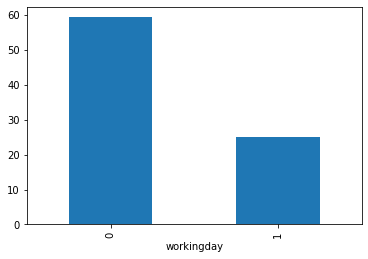

In [320]:
#graphical representation of the mean registered numbers of members in respect to the working day

file.groupby('workingday')['casual'].mean().plot(kind='bar')

<h1> Data Visualization <h1> 
 <h3>Weather:<br>  1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<h3>

In [321]:
#graphical representation of the mean registered numbers of members in respect to the weather

file.groupby('weather')['registered'].mean()

weather
1    164.928115
2    148.170078
3    101.403958
4    158.000000
Name: registered, dtype: float64

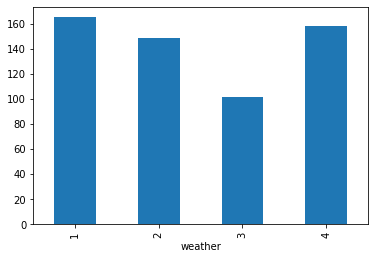

In [322]:
#graphical representation of the mean registered numbers of members in respect to the weather

file.groupby('weather')['registered'].mean().plot(kind='bar')

In [323]:
#graphical representation of the mean non-registered numbers of members in respect to the weather

file.groupby('weather')['casual'].mean()

weather
1    40.308676
2    30.785462
3    17.442375
4     6.000000
Name: casual, dtype: float64

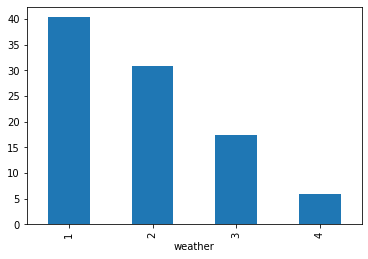

In [324]:
#graphical representation of the mean non-registered numbers of members in respect to the weather

file.groupby('weather')['casual'].mean().plot(kind='bar')

<h1> Data Visualization <h1> 
 <h3>Date and Time<h3>

In [325]:
#we will seperate the individual date and time for each data point into hour, day, month and year

date = file

date['hr']= pd.DatetimeIndex(date['datetime']).hour
date['day']= pd.DatetimeIndex(date['datetime']).day
date['mnth']= pd.DatetimeIndex(date['datetime']).month
date['yr']= pd.DatetimeIndex(date['datetime']).year

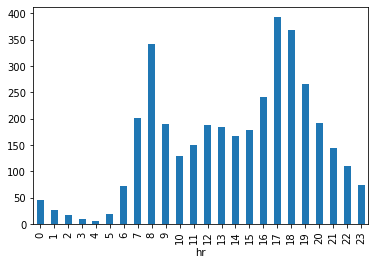

In [326]:
#graphical representation of the mean registered numbers of members in respect to the hour

date.groupby('hr')['registered'].mean().plot(kind='bar')

<h3> For registered members, Bicycle rental demand is usually high during the hours between: <br> <br> - 7am and 9am (This is assumed to be because people get on the road to ride to their workplace during this time) <br> <br> - 4pm and 8pm  (This is assumed to be because people get on the road to ride back home from their workplace during this time) <h3>
 


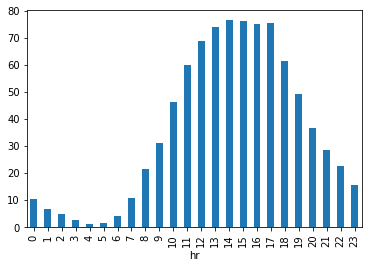

In [327]:
#graphical representation of the mean non-registered numbers of members in respect to the hour
date.groupby('hr')['casual'].mean().plot(kind='bar')


<h3> For non registered members,Bicycle rental demand is usually high during the hours between 10am and 8pm. <br> This can be infered to be because since they dont demand fro rentage often(thus not registered), their time is very flexible to move around the town cince they probably dont go to the office  <h3>

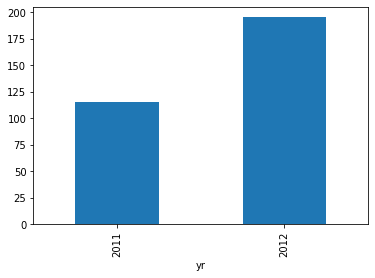

In [328]:
#graphical representation of the mean registered numbers of members in respect to the year

date.groupby('yr')['registered'].mean().plot(kind='bar')

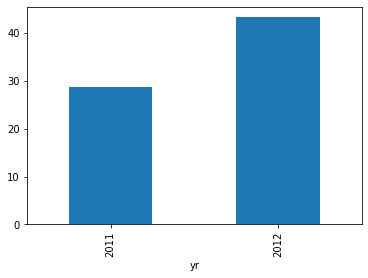

In [329]:
#graphical representation of the mean non-registered numbers of members in respect to the year
date.groupby('yr')['casual'].mean().plot(kind='bar')

In [330]:
member_2011 = date.registered[date.yr==2011].shape[0]
member_2012 = date.registered[date.yr==2012].shape[0]

increase = (member_2012 - member_2011)

In [331]:
print(member_2011)
print(member_2012)
print(increase)

5422
5464
42


In [268]:
percentage_increase = (increase / member_2011) * 100

In [269]:
print('There is a percentage increase of',(percentage_increase),'between the year 2011 and 2012' )

There is a percentage increase of 0.7746219107340465 between the year 2011 and 2012


<h3>There is a percentage increase of 0.7746219107340465 between the year 2011 and 2012<h3>

<h2> Histogram of weather features <h2>

<h3> Temperature: <h3>

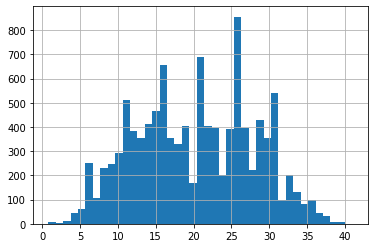

In [270]:
file.temp.hist(bins=int(file.temp.max()))

<h3> Humidity: <h3>

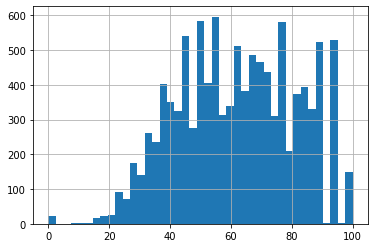

In [271]:
file.humidity.hist(bins=int(file.temp.max()))

<h3> Windspeed: <h3>

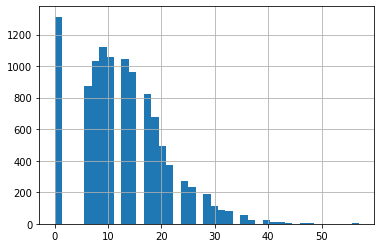

In [272]:
file.windspeed.hist(bins=int(file.temp.max()))

<h3> From the representation above, it shows that the more the wind speed, the lesser people demand for bicycle rental. This is because the wind speed tends to affect the rider's stability on a bicycle<h3>

<h1> Preparing for model training <h1>

In [277]:
file.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,0,1,1


In [273]:
#defining the dependent variable

y = file['registered']

In [274]:
y.shape

(10886,)

In [278]:
#defining the independent variable

X = file.drop(['registered','datetime'], axis=1)

In [279]:
#adding constants to the variables stored in the variable X

x = sm.add_constant(X)
results = sm.OLS(y,x).fit()

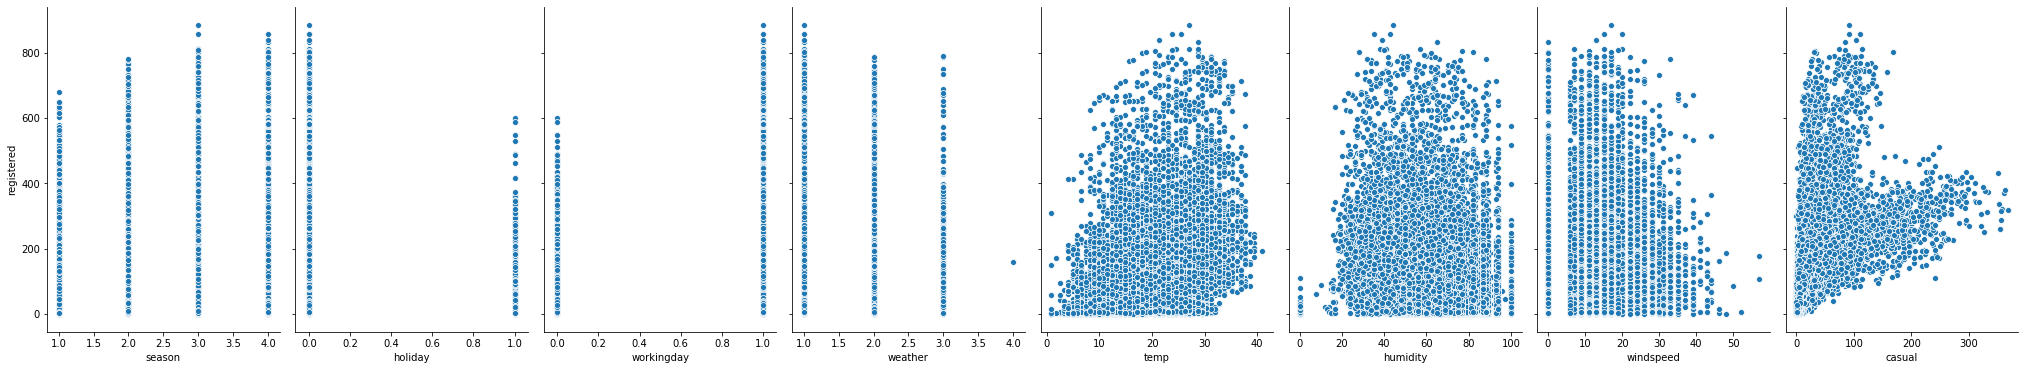

In [283]:
#Checking for linear relationships between each attributes withrespect to the registered attribute

sns.pairplot(file, x_vars=['season','holiday','workingday','weather', 'temp','humidity','windspeed','casual'], y_vars='registered', height=5, aspect=0.7)

In [284]:
#creating a linear regression model

reg = LinearRegression()

In [285]:
#splitting the dataset into 2 for training and for testing purpose

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)

In [286]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8708, 10)
(2178, 10)
(8708,)
(2178,)


In [287]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [288]:
#prints the intercept value of the trained model

print(reg.intercept_)

2.8421709430404007e-13


In [289]:
#prints the coefficients of the attributes in the trained model
print(reg.coef_)

[ 0.00000000e+00 -1.89848137e-13  1.64566521e-13  2.65868057e-14
 -2.31043483e-14 -5.91887650e-15  3.91353616e-15 -2.62984079e-15
 -1.00000000e+00  1.00000000e+00]


In [290]:
y_predict = reg.predict(x)

In [291]:
y_predict

array([ 13.,  32.,  27., ..., 164., 117.,  84.])

In [292]:
reg.score(x,y)

1.0

<h1>The regression score is 1. Therefore, our prediction model is perfectly correct<h1>

In [294]:
#This gives the overall summary details of the prediction model

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.850e+31
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:40:27   Log-Likelihood:             2.8317e+05
No. Observations:               10886   AIC:                        -5.663e+05
Df Residuals:                   10876   BIC:                        -5.663e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.128e-12   6.74e-14    -31.554      0.000   -2.26e-12      -2e-12
season      1.094e-12   1.13e-14     96.610      0.000    1.07e-12    1.12e-12
holiday      4.53e-13   7.28e-14      6.225      0.000     3.1e-13    5.96e-13
workingday  -1.91e-13   2.99e-14     -6.379      0.000    -2.5e-13   -1.32e-13
weather     1.323e-13   2.06e-14      6.440      0.000    9.21e-14    1.73e-13
temp        4.441e-15    1.8e-15      2.462      0.014    9.05e-16    7.98e-15
humidity   -6.245e-15   7.81e-16     -7.998      0.000   -7.78e-15   -4.71e-15
windspeed   2.554e-15   1.54e-15      1.660      0.097   -4.61e-16    5.57e-15
casual        -1.0000   4.02e-16  -2.49e+15      0.000      -1.000      -1.000
count          1.0000   9.65e-17   1.04e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                    26472.347   Durbin-Watson:                   0.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.172
Skew:                          -0.032   Prob(JB):                    5.67e-163
Kurtosis:                       1.718   Cond. No.                     1.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""